In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import re
import warnings
warnings.filterwarnings("ignore") 

In [2]:
dataset = pd.read_csv(r'C:\\Car details v3.csv')
dataset.head()

name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250Nm@ 1500-2500rpm    5.0  
2     12.7@ 2,700(kgm@ rpm)    5.0  
3  22.4 kgm at 1750-2750rpm    5.0  
4     11.5@ 4,500(kgm@ rpm)    5.0

In [3]:
print('The shape of the dataset is: ',dataset.shape)

The shape of the dataset is:  (8128, 13)


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [5]:
dataset.describe(include = 'all')

name         year  selling_price     km_driven  \
count                     8128  8128.000000   8.128000e+03  8.128000e+03   
unique                    2058          NaN            NaN           NaN   
top     Maruti Swift Dzire VDI          NaN            NaN           NaN   
freq                       129          NaN            NaN           NaN   
mean                       NaN  2013.804011   6.382718e+05  6.981951e+04   
std                        NaN     4.044249   8.062534e+05  5.655055e+04   
min                        NaN  1983.000000   2.999900e+04  1.000000e+00   
25%                        NaN  2011.000000   2.549990e+05  3.500000e+04   
50%                        NaN  2015.000000   4.500000e+05  6.000000e+04   
75%                        NaN  2017.000000   6.750000e+05  9.800000e+04   
max                        NaN  2020.000000   1.000000e+07  2.360457e+06   

          fuel seller_type transmission        owner    mileage   engine  \
count     8128        8128         8128         8128       7907     7907   
unique       4           3            2            5        393      121   
top     Diesel  Individual       Manual  First Owner  18.9 kmpl  1248 CC   
freq      4402        6766         7078         5289        225     1017   
mean       NaN         NaN          NaN          NaN        NaN      NaN   
std        NaN         NaN          NaN          NaN        NaN      NaN   
min        NaN         NaN          NaN          NaN        NaN      NaN   
25%        NaN         NaN          NaN          NaN        NaN      NaN   
50%        NaN         NaN          NaN          NaN        NaN      NaN   
75%        NaN         NaN          NaN          NaN        NaN      NaN   
max        NaN         NaN          NaN          NaN        NaN      NaN   

       max_power          torque        seats  
count       7913            7906  7907.000000  
unique       322             441          NaN  
top       74 bhp  190Nm@ 2000rpm          NaN  
freq         377             530          NaN  
mean         NaN             NaN     5.416719  
std          NaN             NaN     0.959588  
min          NaN             NaN     2.000000  
25%          NaN             NaN     5.000000  
50%          NaN             NaN     5.000000  
75%          NaN             NaN     5.000000  
max          NaN             NaN    14.000000

In [6]:
dataset.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

# Exploratory Data Analysis

In [7]:
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=dataset['owner'], name="Ownership", textinfo='label+percent'),
              1, 1)
fig.add_trace(go.Pie(labels=dataset['seller_type'], name="Seller Type",textinfo='label+percent'),
              1, 2)

fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Seller Profile",
    annotations=[dict(text='Ownership', x=0.17, y=0.5, font_size=15, showarrow=False),
                 dict(text='Seller Type', x=0.83, y=0.5, font_size=15, showarrow=False)])
fig.show()

In [8]:
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=dataset['fuel'], name="Fuel Type",textinfo='label+percent'),
              1, 1)
fig.add_trace(go.Pie(labels=dataset['transmission'], name="Transmission", textinfo='label+percent'),
              1, 2)

fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Basic Car Information",

    annotations=[dict(text='Fuel Type', x=0.17, y=0.5, font_size=15, showarrow=False),
                 dict(text='Transmission', x=0.83, y=0.5, font_size=15, showarrow=False)])
fig.show()

In [9]:
most_sold = dataset.name.value_counts()[:10]
px.bar(data_frame = most_sold, x = most_sold.index, y = most_sold, labels= {'index':'Car Name', 'y': 'Quantity Sold'}, 
       title = 'Most sold cars over the past 20 years')

In [10]:
engine = dataset.engine.value_counts()[:10]
px.bar(x = engine.index, y = engine, labels = {'x': 'Engine Type', 'y': 'Count'}, title = 'Most Popular Engine Types')

In [11]:
power = []
mileage = []

for i in range(0, 8128):
    temp = str(dataset['mileage'][i])
    temp = re.sub('[^0-9.]', '', temp)
    mileage.append(temp)
while('' in mileage) :
    mileage.remove('')
    mileage.sort()

for i in range(0, 8128):
    temp = str(dataset['max_power'][i])
    temp = re.sub('[^0-9.]', '', temp)
    power.append(temp)
while('' in power) :
    power.remove('')
    power.sort()
    
power = power[:len(power)-5]
px.line(x = mileage, y = power, title = "Mileage vs. Power", labels = {'x': 'Mileage in kmpl', 'y': 'Power in bhp'})

In [12]:
df = dataset.groupby(['year']).mean()
px.line(data_frame = df, x = df.index, y = 'selling_price', labels = {'year': 'Year', 'selling_price': 'Average Selling Price'},
       title = 'Average Selling Price Per Year')

In [13]:
px.line(data_frame = df, x = df.index, y = 'km_driven', labels = {'year': 'Year', 'km_driven': 'Average Distance Travelled in kms'},
       title = 'Average Distance Travelled Per Year')

# Feature Engineering

Label encoding all the necessary columns

In [14]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
dataset['fuel'] = labelEncoder.fit_transform(dataset['fuel'])
dataset['transmission'] = labelEncoder.fit_transform(dataset['transmission'])
dataset['owner'] = labelEncoder.fit_transform(dataset['owner'])
dataset['seller_type'] = labelEncoder.fit_transform(dataset['seller_type'])

Removing all the 'Nan' values and dropping useless columns

In [15]:
dataset.dropna(inplace = True)
dataset.reset_index(inplace = True, drop = True)
dataset.drop(['name', 'torque'], inplace = True, axis = 1)

Cleaning certain useful columns such as: mileage, engine, max_power

In [16]:
lst, lst1, lst2 = [], [], []
for i in range(0, 7906):
    lst.append(re.sub('[^0-9.]', '', str(dataset['mileage'][i])))
    lst1.append(re.sub('[^0-9.]', '', str(dataset['engine'][i])))
    lst2.append(re.sub('[^0-9.]', '', str(dataset['max_power'][i])))
new_lst = list(map(float, lst))
new_lst1 = list(map(float, lst1))
new_lst2 = list(map(float, lst2))
dataset['mileage'] = new_lst
dataset['engine'] = new_lst1
dataset['max_power'] = new_lst2
dataset.head()


year  selling_price  km_driven  fuel  seller_type  transmission  owner  \
0  2014         450000     145500     1            1             1      0   
1  2014         370000     120000     1            1             1      2   
2  2006         158000     140000     3            1             1      4   
3  2010         225000     127000     1            1             1      0   
4  2007         130000     120000     3            1             1      0   

   mileage  engine  max_power  seats  
0    23.40  1248.0      74.00    5.0  
1    21.14  1498.0     103.52    5.0  
2    17.70  1497.0      78.00    5.0  
3    23.00  1396.0      90.00    5.0  
4    16.10  1298.0      88.20    5.0

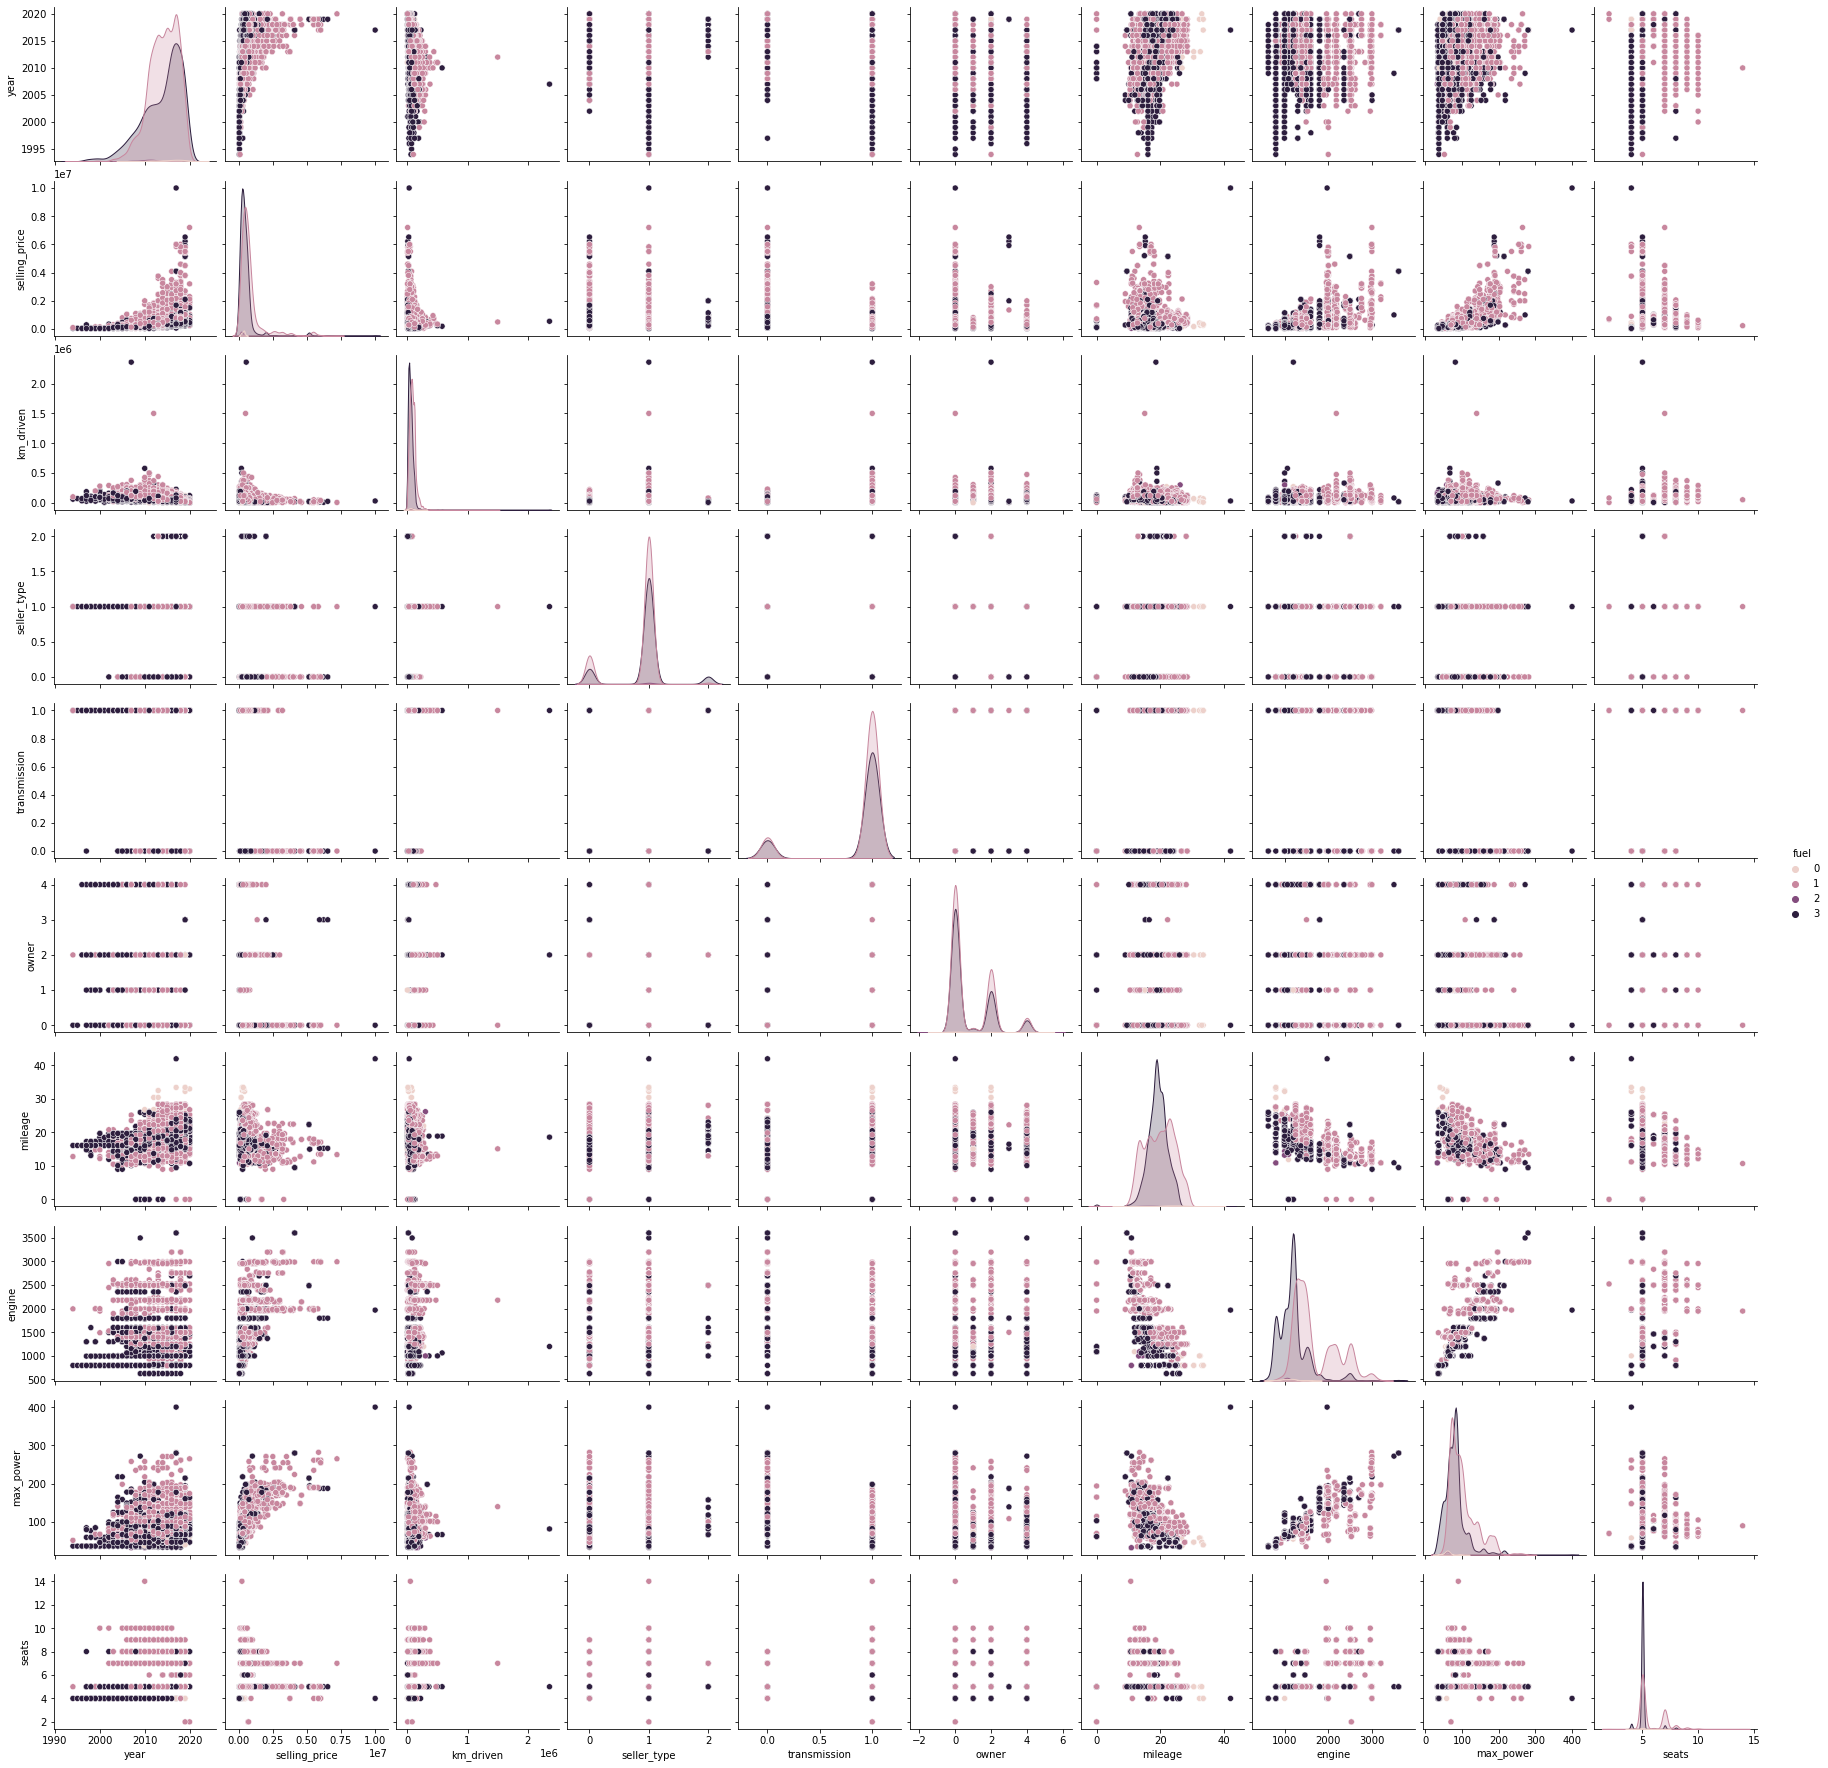

In [17]:
sns.pairplot(dataset, hue = 'fuel')
plt.show()

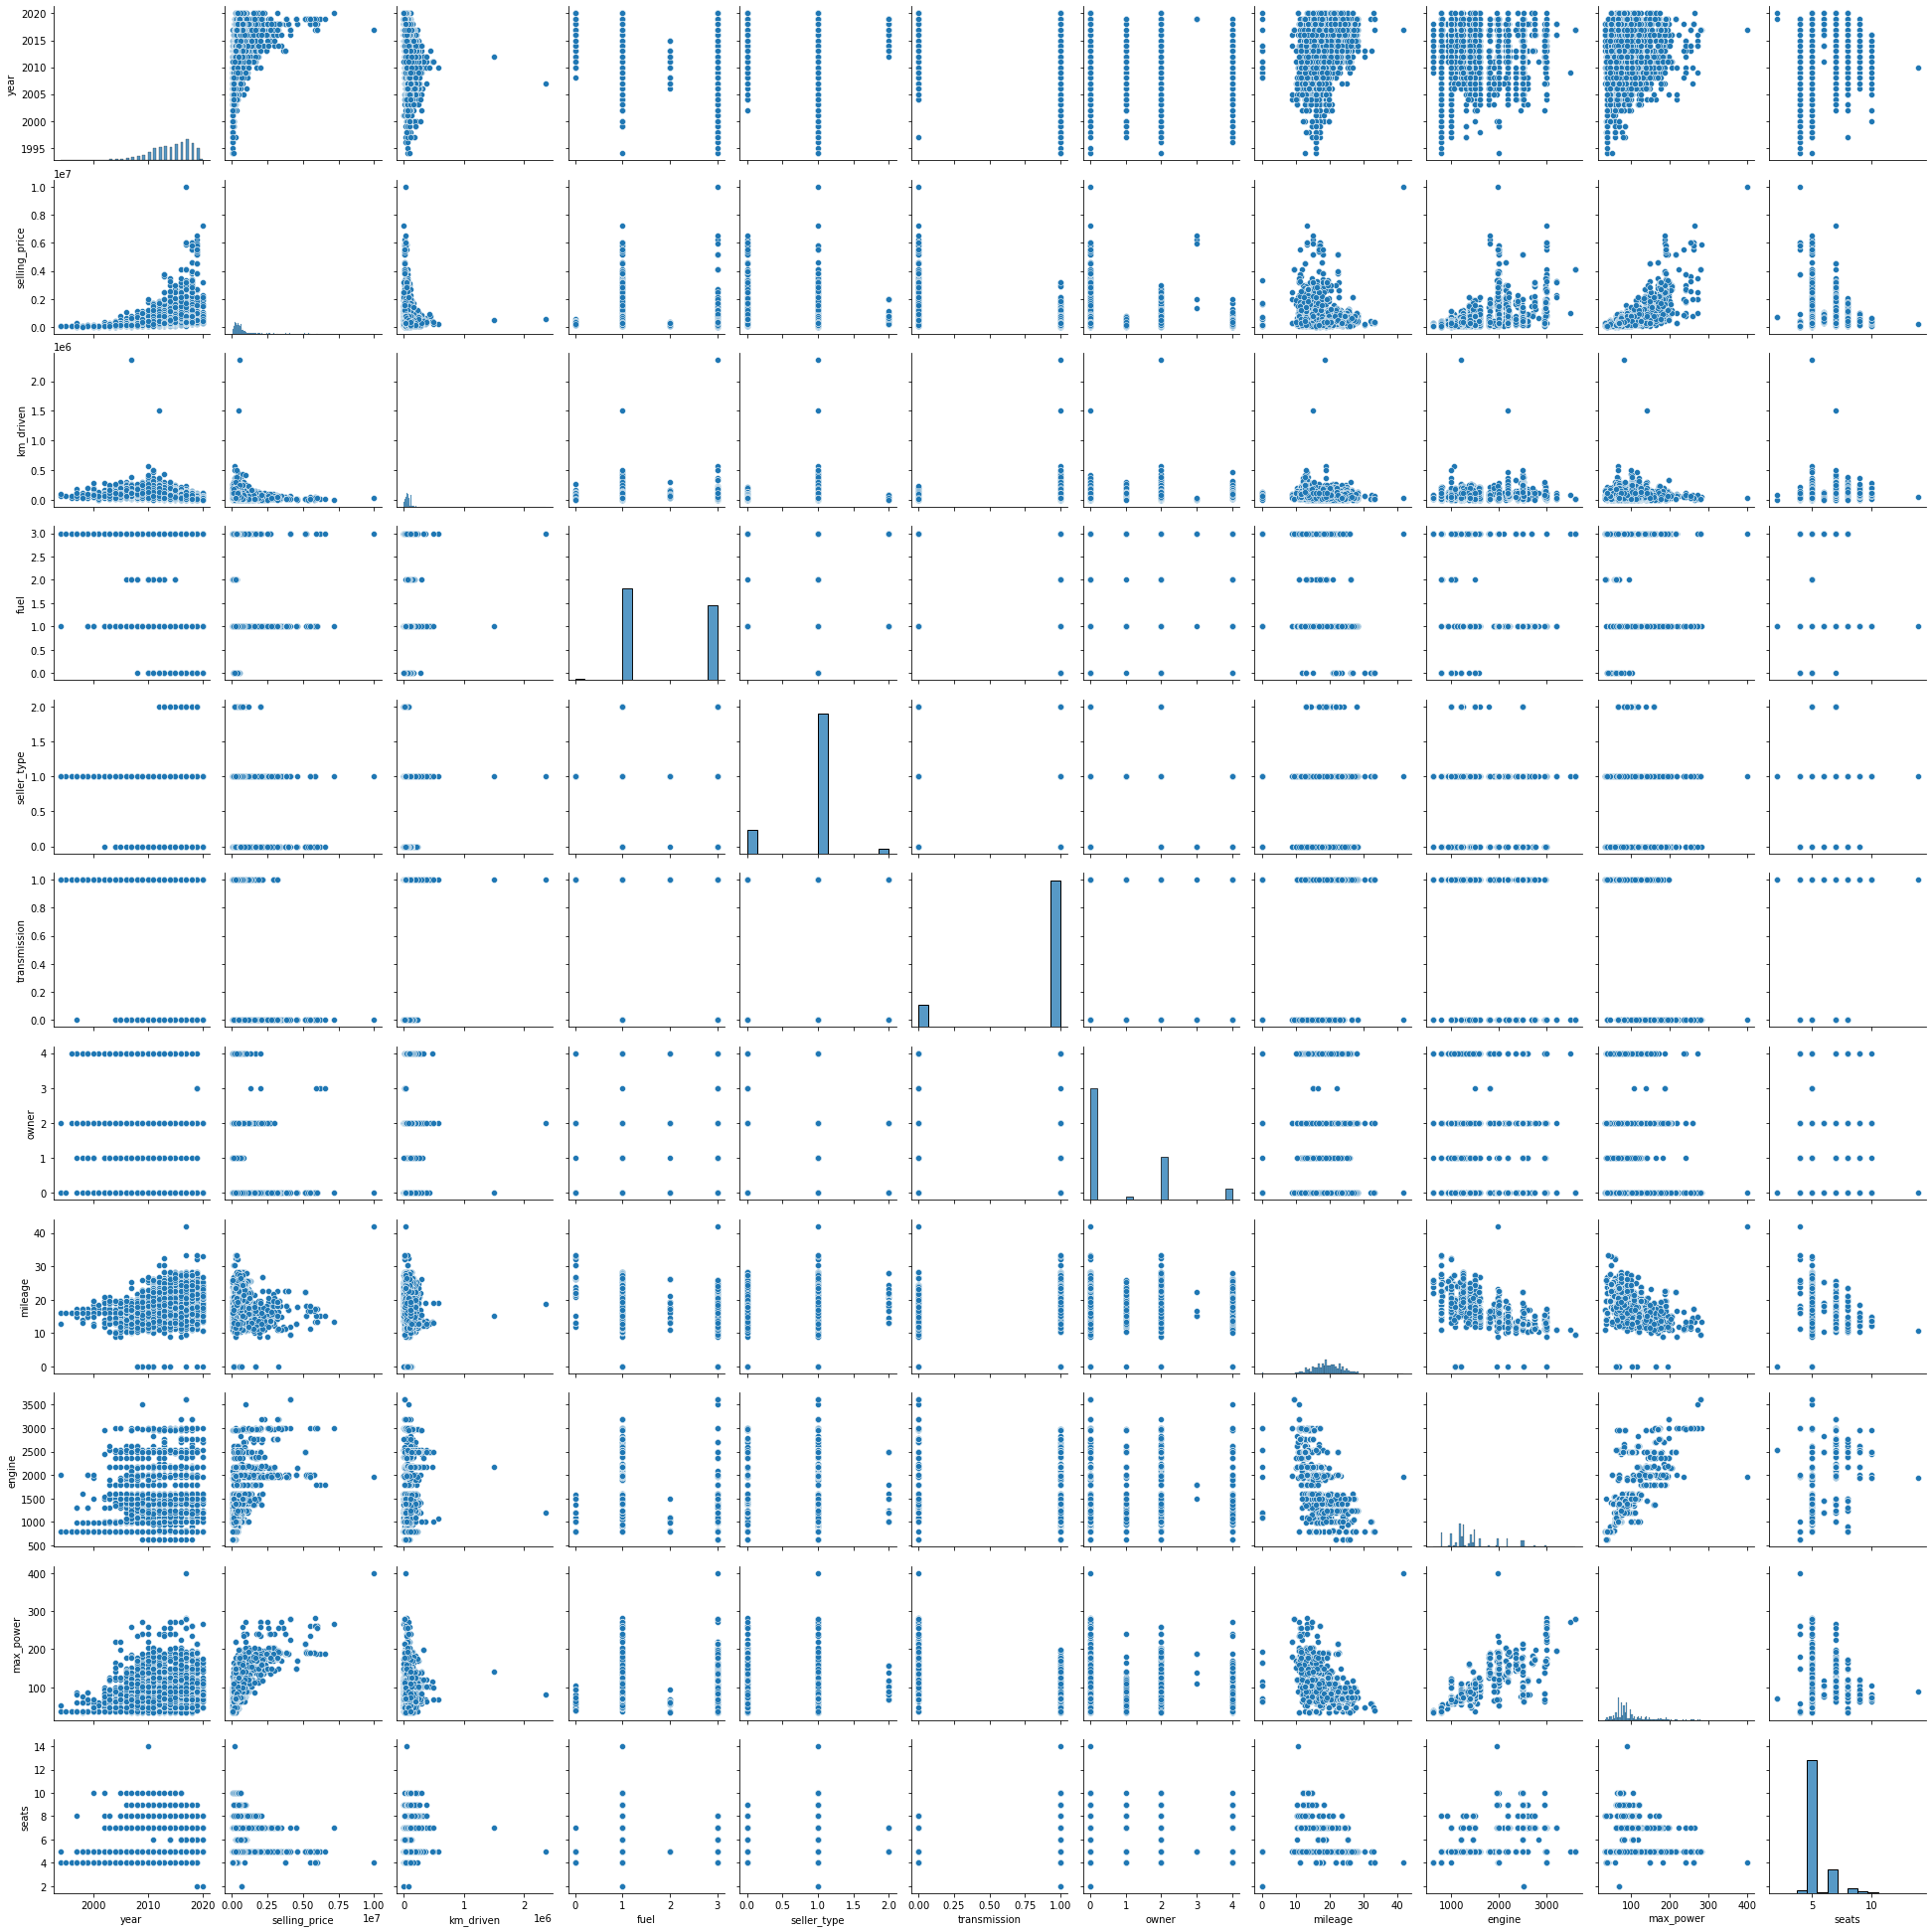

In [18]:
sns.pairplot(dataset)

Heatmap showing correlation between various columns

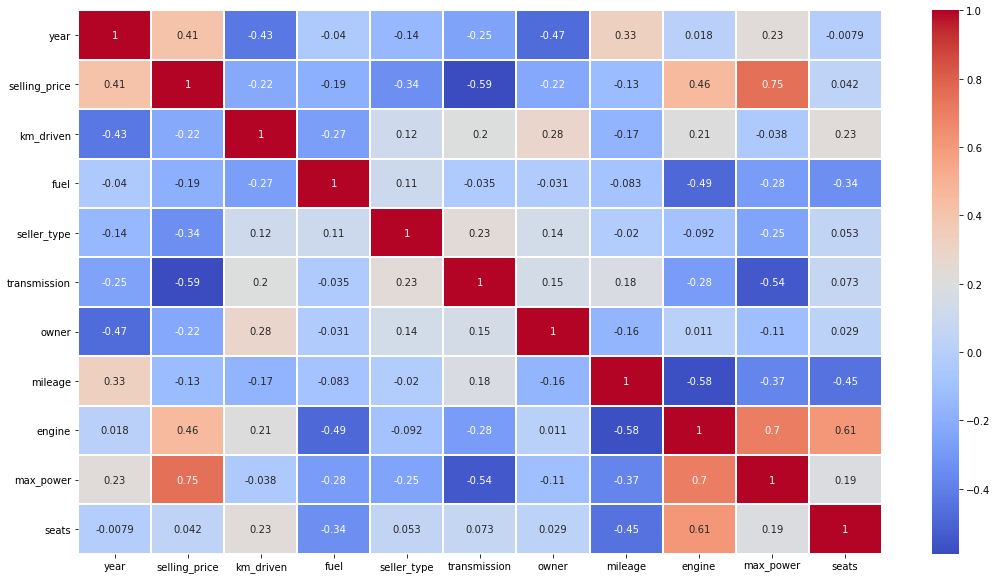

In [19]:
plt.figure(figsize=(18, 10))
sns.heatmap(dataset.corr(), linecolor = 'white', linewidths = 1, cmap = 'coolwarm', annot=True)
plt.show()

# Spitting the Dataset

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(dataset.drop('selling_price', axis = 1)), np.array(dataset['selling_price']), 
                                                    test_size = 0.25, random_state = 0)

In [21]:
from sklearn.ensemble import RandomForestRegressor

In [22]:
regressor=RandomForestRegressor()

In [23]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [24]:
from sklearn.model_selection import RandomizedSearchCV

In [25]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [26]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [27]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [28]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [29]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  12.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   8.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   9.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   9.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  12.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  16.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   9.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [30]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [31]:
rf_random.best_score_

-29508670829.529472

In [32]:
predictions=rf_random.predict(X_test)

In [33]:
predictions

array([ 422488.42357143,  779000.        ,  197668.24825   , ...,
        464018.55666667,  225035.26387302, 4087230.        ])

<AxesSubplot:ylabel='Density'>

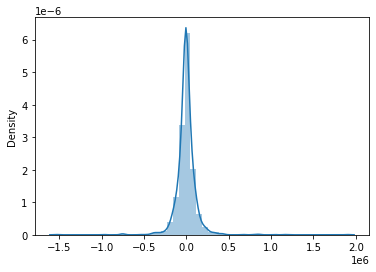

In [34]:
sns.distplot(y_test-predictions)

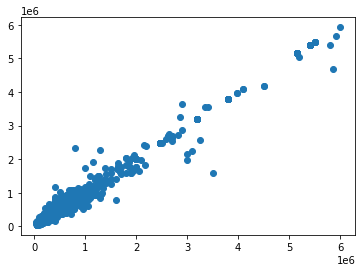

In [35]:
plt.scatter(y_test,predictions)

In [36]:
from sklearn import metrics

In [37]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 67589.61686239888
MSE: 15723281050.79233
RMSE: 125392.50795319604


In [38]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pklnaik', 'wb')

# dump information to that file
pickle.dump(rf_random, file)